# Building Micrograd

source: https://github.com/karpathy/micrograd/

In [1]:
# micrograd Value class

class Value:
    """ stores a single scalar value and its gradient """

    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self.label = label  # optional, Value variable/node name

        # internal variables used for autograd graph construction
        self._prev = set(_children) # previous node
        self._op = _op              # the operation that produced this node

    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')
        return out
    
    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')
        return out


In [2]:
# let's build an expression

a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = a * b;  c.label='c'
d = Value(10.0, label='d')
e = c + d;  e.label='e'
f = Value(-2.0, label='f')
L = e * f;  L.label='L'
print(L) # L is loss function which we will try to minimize in backpropagation

Value(data=-8.0)


In [3]:
# and take a look at the Value objects

print(f'{a.label}: prev:{a._prev}, op: {a._op}')
print(f'{b.label}: prev:{b._prev}, op: {b._op}')
print(f'{c.label}: prev:{c._prev}, op: {c._op}')
print(f'{d.label}: prev:{d._prev}, op: {d._op}')
print(f'{e.label}: prev:{e._prev}, op: {e._op}')
print(f'{f.label}: prev:{f._prev}, op: {f._op}')
print(f'{L.label}: prev:{L._prev}, op: {L._op}')

a: prev:set(), op: 
b: prev:set(), op: 
c: prev:{Value(data=2.0), Value(data=-3.0)}, op: *
d: prev:set(), op: 
e: prev:{Value(data=-6.0), Value(data=10.0)}, op: +
f: prev:set(), op: 
L: prev:{Value(data=-2.0), Value(data=4.0)}, op: *


In [4]:
# create functions for graphing and debugging using graphviz

from graphviz import Digraph

def trace(root):
    # builds a set of all nodes and edges in a graph
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root, format='svg', rankdir='LR'):
    """
    format: png | svg | ...
    rankdir: TB (top to bottom graph) | LR (left to right)
    """
    assert rankdir in ['LR', 'TB']
    nodes, edges = trace(root)
    dot = Digraph(format=format, graph_attr={'rankdir': rankdir})
    
    for n in nodes:
        dot.node(name=str(id(n)), label = "{ %s | data: %.4f }" % (n.label, n.data), shape='record')
        if n._op:
            dot.node(name=str(id(n)) + n._op, label=n._op)
            dot.edge(str(id(n)) + n._op, str(id(n)))
    
    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
    
    return dot

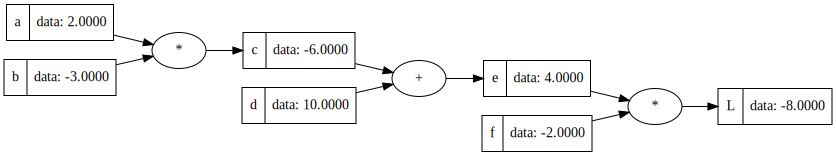

In [5]:
# let's take a look at the expression graph

draw_dot(L)